# Credit card default prediction

### Dataset source: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/data

### Problem statement
#### Business Objective
Estimate the probability that a credit card client will default on their payment in the next month, enabling risk teams to make decisions such as adjusting credit limits, prioritizing collections, or setting monitoring strategies to reduce expected loss.

##### Target Variable
The target variable is "**default.payment.next.month**", which indicates whether a client will default on their credit card payment in the next month. It is a binary variable where 1 indicates default and 0 indicates no default.

##### Input data
- **Dataset size**: 30,000 clients from a Taiwanese bank (UCI/Kaggle dataset).
- **Features**:  23, excluding ID and target variable.
1. **Client demographics** (SEX, EDUCATION, MARRIAGE, AGE).
2. **Financial standing** (LIMIT_BAL).
3. **History of past payments** (PAY_0, PAY_2 to PAY_6).
4. **Bill statement amounts** (BILL_AMT1 to BILL_AMT6).
5. **Previous payment amounts** (PAY_AMT1 to PAY_AMT6).

##### Output
Calibrated probability of default within the next month per client.







#### Data understanding
To understand the dataset, I would take the following steps:

- **Load the data**: Read the UCI_Credit_Card.csv file into a pandas DataFrame.
- **Initial Exploration**: Examine the first few rows, column names, and data types.
- **Descriptive Statistics**: Generate summary statistics for numerical columns to understand their distribution (e.g., mean, median, min, max).
- **Meaningful names** for columns
- **Missing Values**: Check for missing values in each column to identify data quality issues.
- **Target Variable Analysis**: Analyze the distribution of the 'default.payment.next.month' column to spot outliers or skewness.
- **Feature Analysis**:
1. **For categorical features**, I'll examine the unique values and their frequencies.
2. **For numerical features**, I'll look at their distributions using histograms.
- **Correlation Analysis**: Investigate relationships between features and the target variable, 'default.payment.next.month'.

In [347]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data/UCI_Credit_Card.csv')
# Examine the first few rows, column names, and data types
data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [348]:
# Examine column names, and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [349]:
# Total number of rows and columns
data.shape

(30000, 25)

In [350]:
# Check for missing values in each column to identify data quality issues.
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [351]:
# Rename columns to be more descriptive
data.rename(columns={
    'LIMIT_BAL': 'Credit_Limit',
    'SEX': 'Gender',
    'EDUCATION': 'Education',
    'MARRIAGE': 'Marital_Status',
    'AGE': 'Age',
    'PAY_0': 'Repayment_Status_Sept',
    'PAY_2': 'Repayment_Status_Aug',
    'PAY_3': 'Repayment_Status_Jul',
    'PAY_4': 'Repayment_Status_Jun',
    'PAY_5': 'Repayment_Status_May',
    'PAY_6': 'Repayment_Status_Apr',
    'BILL_AMT1': 'Bill_Amount_Sept',
    'BILL_AMT2': 'Bill_Amount_Aug',
    'BILL_AMT3': 'Bill_Amount_Jul',
    'BILL_AMT4': 'Bill_Amount_Jun',
    'BILL_AMT5': 'Bill_Amount_May',
    'BILL_AMT6': 'Bill_Amount_Apr',
    'PAY_AMT1': 'Previous_Payment_Sept',
    'PAY_AMT2': 'Previous_Payment_Aug',
    'PAY_AMT3': 'Previous_Payment_Jul',
    'PAY_AMT4': 'Previous_Payment_Jun',
    'PAY_AMT5': 'Previous_Payment_May',
    'PAY_AMT6': 'Previous_Payment_Apr',
    'default.payment.next.month': 'Default_Payment'
}, inplace=True)

# Display the first 5 rows with new column names
data.head()

,ID,Credit_Limit,Gender,Education,Marital_Status,Age,Repayment_Status_Sept,Repayment_Status_Aug,Repayment_Status_Jul,Repayment_Status_Jun,...,Bill_Amount_Jun,Bill_Amount_May,Bill_Amount_Apr,Previous_Payment_Sept,Previous_Payment_Aug,Previous_Payment_Jul,Previous_Payment_Jun,Previous_Payment_May,Previous_Payment_Apr,Default_Payment
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [352]:
# Analyze the distribution of the target variable
default_counts = data['Default_Payment'].value_counts()
print(default_counts)

Default_Payment
0    23364
1     6636
Name: count, dtype: int64


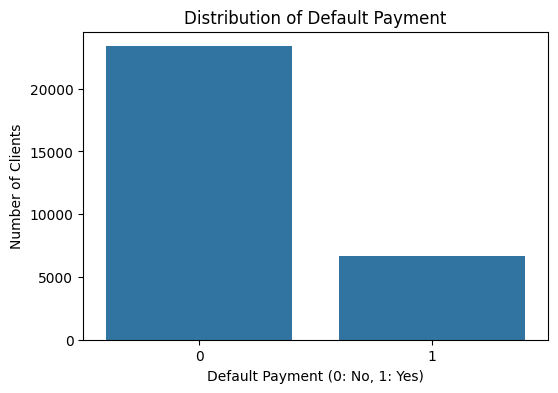

In [353]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Default_Payment', data=data)
plt.title('Distribution of Default Payment')
plt.xlabel('Default Payment (0: No, 1: Yes)')
plt.ylabel('Number of Clients')
plt.show()

#### Data preparation
After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling. Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with sklearn.
- Drop ID column as it is not needed for prediction.
- For Education, 1=graduate school, 2=university, 3=high school, 4=others. Values 0, 5, and 6 are not documented and can be grouped into 'others' (4).
- For Marital Status, 1=married, 2=single, 3=others. The value 0 is not documented and can be grouped into 'others' (3).
- Verify the unique values after cleaning.
- Save the cleaned data to a new CSV file.
- Load the cleaned data to verify.

In [354]:
# Drop the ID column as it is not needed for prediction
if 'ID' in data.columns:
    data = data.drop('ID', axis=1)

In [355]:
# The dataset description indicates that for Education, 1=graduate school, 2=university, 3=high school, 4=others.
# Values 0, 5, and 6 are not documented and can be grouped into 'others' (4).
data['Education'] = data['Education'].replace([0, 5, 6], 4)

In [356]:
# For Marital Status, 1=married, 2=single, 3=others.
# The value 0 is not documented and can be grouped into 'others' (3).
data['Marital_Status'] = data['Marital_Status'].replace(0, 3)

In [357]:
# Verify the unique values after cleaning
print("Unique values in 'Education' after cleaning:", sorted(data['Education'].unique()))
print("Unique values in 'Marital_Status' after cleaning:", sorted(data['Marital_Status'].unique()))

Unique values in 'Education' after cleaning: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Unique values in 'Marital_Status' after cleaning: [np.int64(1), np.int64(2), np.int64(3)]


In [358]:
data.head()

,Credit_Limit,Gender,Education,Marital_Status,Age,Repayment_Status_Sept,Repayment_Status_Aug,Repayment_Status_Jul,Repayment_Status_Jun,Repayment_Status_May,...,Bill_Amount_Jun,Bill_Amount_May,Bill_Amount_Apr,Previous_Payment_Sept,Previous_Payment_Aug,Previous_Payment_Jul,Previous_Payment_Jun,Previous_Payment_May,Previous_Payment_Apr,Default_Payment
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [359]:
# Save the cleaned data to a new CSV file
data.to_csv('data/credit_card_cleaned.csv', index=False)

print("Cleaned data saved to 'credit_card_cleaned.csv'")

Cleaned data saved to 'credit_card_cleaned.csv'


In [360]:
data = pd.read_csv('data/credit_card_cleaned.csv')
data.head()

,Credit_Limit,Gender,Education,Marital_Status,Age,Repayment_Status_Sept,Repayment_Status_Aug,Repayment_Status_Jul,Repayment_Status_Jun,Repayment_Status_May,...,Bill_Amount_Jun,Bill_Amount_May,Bill_Amount_Apr,Previous_Payment_Sept,Previous_Payment_Aug,Previous_Payment_Jul,Previous_Payment_Jun,Previous_Payment_May,Previous_Payment_Apr,Default_Payment
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [361]:
# Total number of rows and columns
data.shape

(30000, 24)

In [362]:
# Check for missing values in each column to identify data quality issues.
data.isnull().sum()

Credit_Limit             0
Gender                   0
Education                0
Marital_Status           0
Age                      0
Repayment_Status_Sept    0
Repayment_Status_Aug     0
Repayment_Status_Jul     0
Repayment_Status_Jun     0
Repayment_Status_May     0
Repayment_Status_Apr     0
Bill_Amount_Sept         0
Bill_Amount_Aug          0
Bill_Amount_Jul          0
Bill_Amount_Jun          0
Bill_Amount_May          0
Bill_Amount_Apr          0
Previous_Payment_Sept    0
Previous_Payment_Aug     0
Previous_Payment_Jul     0
Previous_Payment_Jun     0
Previous_Payment_May     0
Previous_Payment_Apr     0
Default_Payment          0
dtype: int64

#### Modeling
With final dataset in hand, it is now time to build some models. Here, we build a number of different classification models with the Default_Payment as the target. In building models, we should explore different parameters and be sure to cross-validate your findings.

Since the target variable `Default_Payment` is binary (0 or 1), this is a classification problem. I will use the following classification models:
1. Logistic Regression
2. Lasso Regression (for feature selection)
3. Polynomial Regression
4. Random Forest Classifier

In [363]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define features (X) and target (y)
X = data.drop('Default_Payment', axis=1)
y = data['Default_Payment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##### Logistic Regression

In [364]:
# Create and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42, solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))


Logistic Regression Results:
Accuracy: 0.808

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000


Confusion Matrix:
 [[4526  147]
 [1005  322]]


##### Lasso Regression (L1 Regularization)
Lasso will be used for feature selection to see if a simpler model can perform well.

In [365]:
# Create and train the Lasso model
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

# Get the coefficients
lasso_coef = lasso.coef_
print("Lasso Coefficients:", lasso_coef)

# Select features where the coefficient is not zero
selected_features = X.columns[lasso_coef != 0]
print("\nSelected Features by Lasso:", selected_features)

# Train a new Logistic Regression model with the selected features
X_train_lasso = X_train[selected_features]
X_test_lasso = X_test[selected_features]

# Scale the selected features
scaler_lasso = StandardScaler()
X_train_lasso_scaled = scaler_lasso.fit_transform(X_train_lasso)
X_test_lasso_scaled = scaler_lasso.transform(X_test_lasso)

log_reg_lasso = LogisticRegression(random_state=42, solver='liblinear')
log_reg_lasso.fit(X_train_lasso_scaled, y_train)

# Make predictions
y_pred_log_reg_lasso = log_reg_lasso.predict(X_test_lasso_scaled)

# Evaluate the model
print("\nLogistic Regression with Lasso Selected Features Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_lasso))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg_lasso))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg_lasso))


Lasso Coefficients: [-0.01093495 -0.         -0.         -0.00337246  0.00279287  0.10394637
  0.01985733  0.0132296   0.004252    0.          0.         -0.02309768
 -0.         -0.         -0.         -0.         -0.         -0.00463285
 -0.00112467 -0.         -0.         -0.         -0.        ]

Selected Features by Lasso: Index(['Credit_Limit', 'Marital_Status', 'Age', 'Repayment_Status_Sept',
       'Repayment_Status_Aug', 'Repayment_Status_Jul', 'Repayment_Status_Jun',
       'Bill_Amount_Sept', 'Previous_Payment_Sept', 'Previous_Payment_Aug'],
      dtype='object')

Logistic Regression with Lasso Selected Features Results:
Accuracy: 0.806

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.68      0.24      0.35      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.60      0.62      6000
weighted avg       0.79      0.81      0.77    

##### Polynomial Features with Logistic Regression
We will create polynomial features to capture non-linear relationships.

In [366]:
# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Create and train the Logistic Regression model with polynomial features
log_reg_poly = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_poly.fit(X_train_poly, y_train)

# Make predictions
y_pred_log_reg_poly = log_reg_poly.predict(X_test_poly)

# Evaluate the model
print("\nPolynomial Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_poly))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg_poly))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg_poly))



Polynomial Logistic Regression Results:
Accuracy: 0.8136666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.66      0.32      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000


Confusion Matrix:
 [[4456  217]
 [ 901  426]]


##### Random Forest Classifier

In [367]:
# Create and train the Random Forest Classifier model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Results:
Accuracy: 0.813

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.64      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000


Confusion Matrix:
 [[4398  275]
 [ 847  480]]


#### Model Comparison
Now we will compare the performance of all the models together.

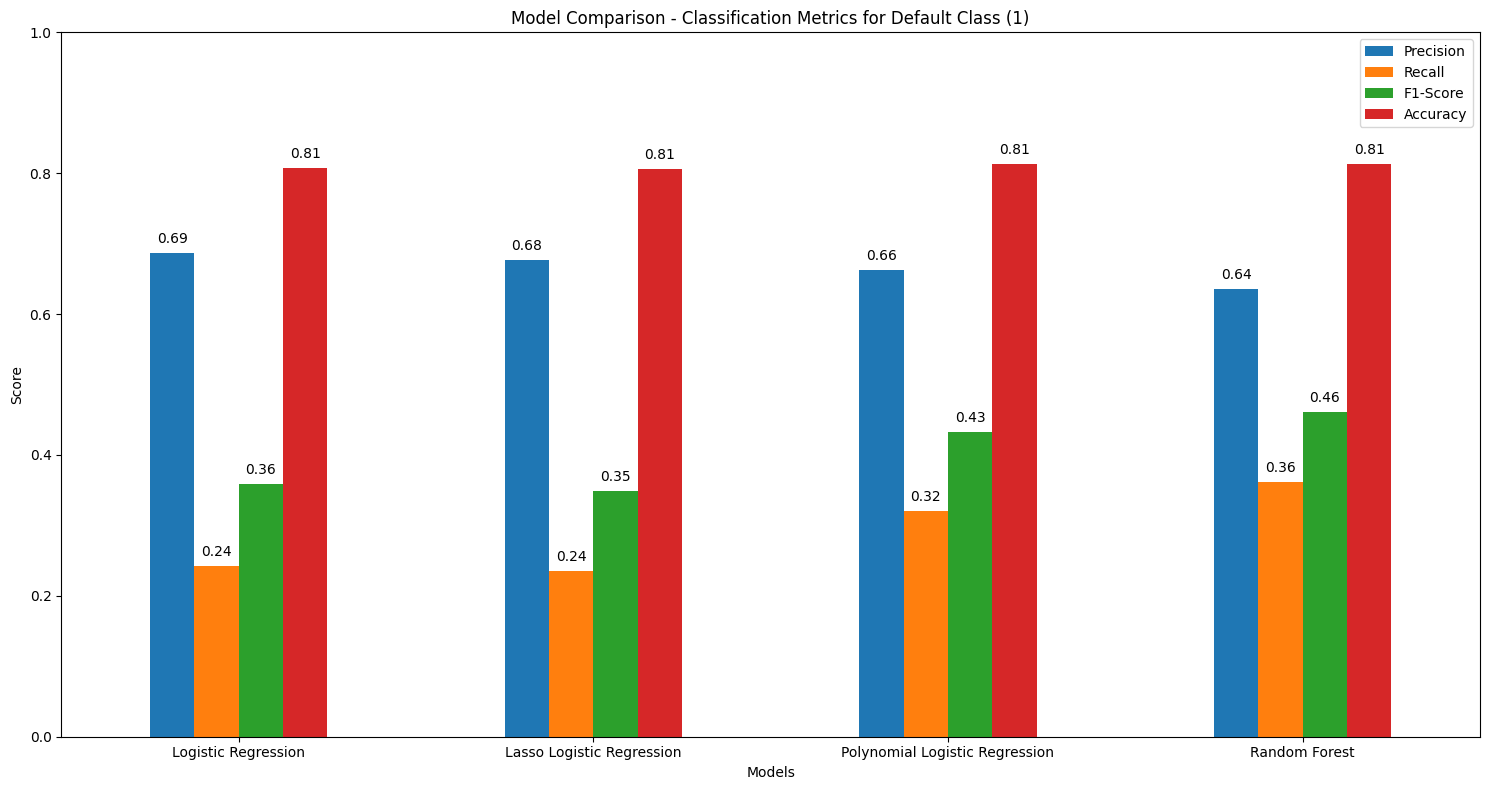

,Precision,Recall,F1-Score,Accuracy
Logistic Regression,0.686567,0.242653,0.358575,0.808000
Lasso Logistic Regression,0.676790,0.235117,0.348993,0.806000
Polynomial Logistic Regression,0.662519,0.321025,0.432487,0.813667
Random Forest,0.635762,0.361718,0.461095,0.813000


In [368]:
import numpy as np

# Get classification reports as dictionaries
report_log_reg = classification_report(y_test, y_pred_log_reg, output_dict=True)
report_log_reg_lasso = classification_report(y_test, y_pred_log_reg_lasso, output_dict=True)
report_log_reg_poly = classification_report(y_test, y_pred_log_reg_poly, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Extract metrics for class '1' (default) and accuracy
models = [
    'Logistic Regression',
    'Lasso Logistic Regression',
    'Polynomial Logistic Regression',
    'Random Forest'
]

reports = [
    report_log_reg,
    report_log_reg_lasso,
    report_log_reg_poly,
    report_rf
]

metrics_data = {
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'Accuracy': []
}

for report in reports:
    metrics_data['Precision'].append(report['1']['precision'])
    metrics_data['Recall'].append(report['1']['recall'])
    metrics_data['F1-Score'].append(report['1']['f1-score'])
    metrics_data['Accuracy'].append(report['accuracy'])

df_metrics = pd.DataFrame(metrics_data, index=models)

# Plotting the metrics
ax = df_metrics.plot(kind='bar', figsize=(15, 8), rot=0)
plt.title('Model Comparison - Classification Metrics for Default Class (1)')
plt.ylabel('Score')
plt.xlabel('Models')
plt.ylim(0, 1)
plt.legend(loc='best')

# Add annotations to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()

display(df_metrics)

#### Confusion Matrix Heatmaps
To better visualize the performance of each model, we can plot their confusion matrices as heatmaps. This will give us a clearer picture of the true positives, true negatives, false positives, and false negatives for each model.

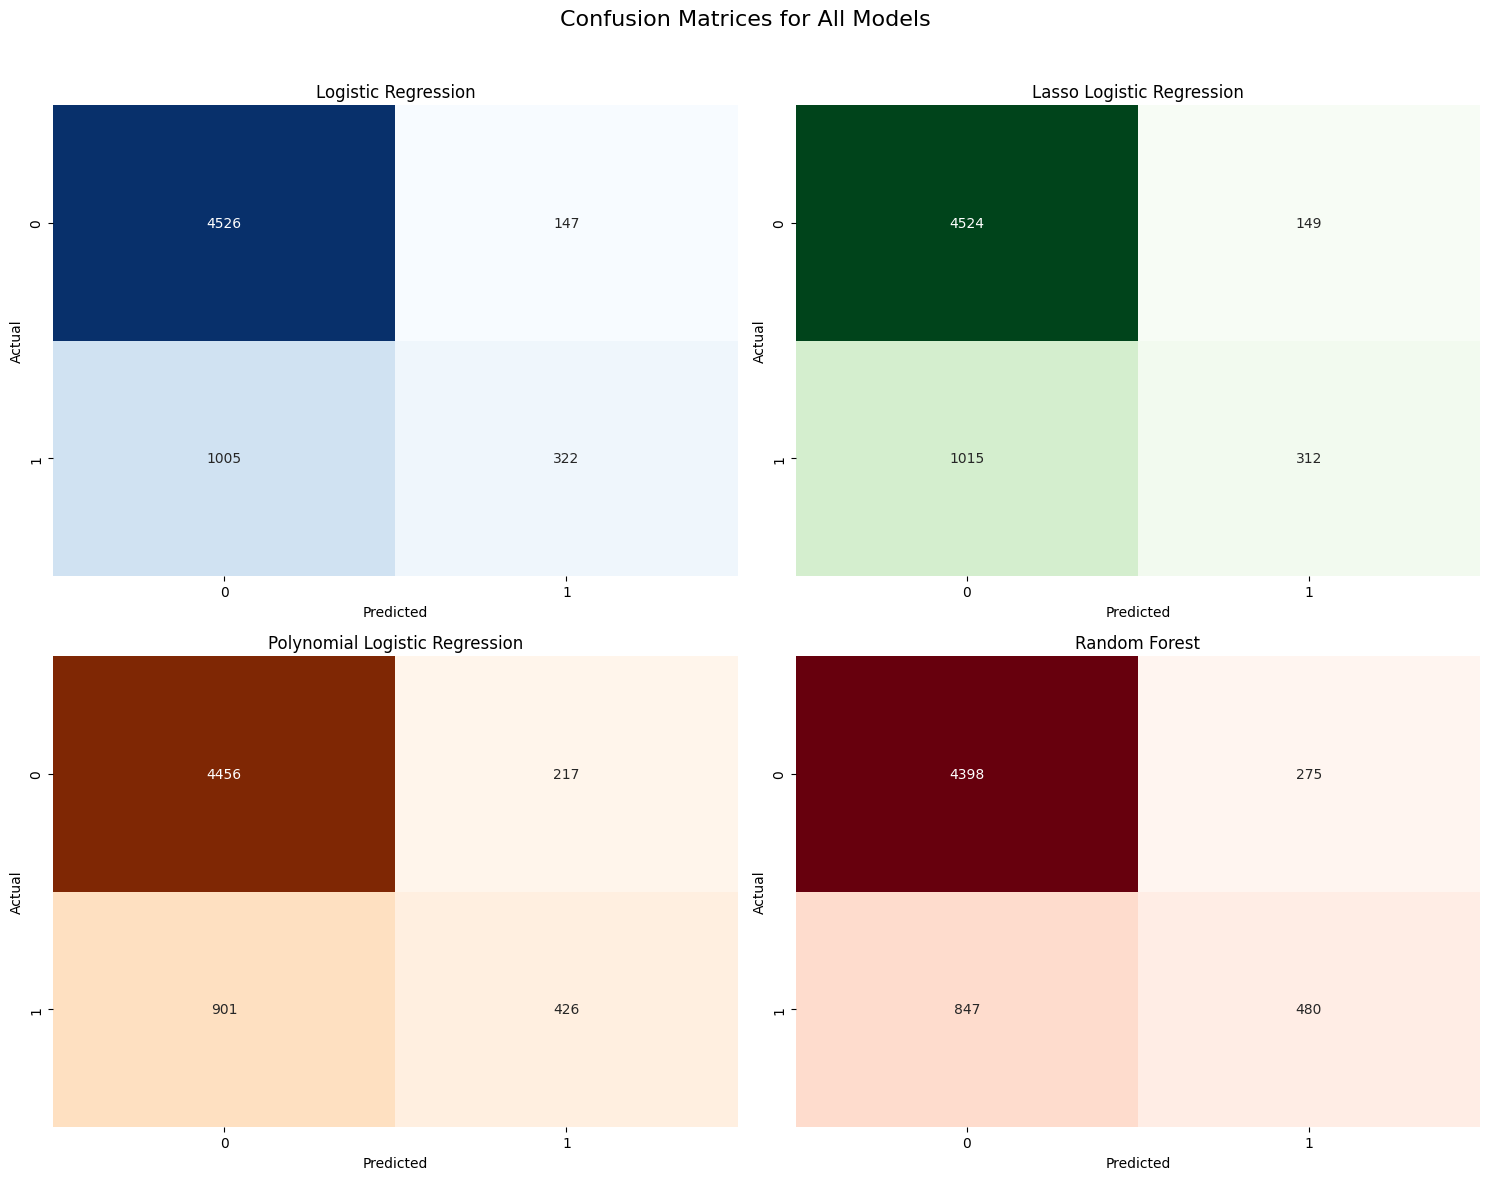

In [369]:
# Get confusion matrices
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_log_reg_lasso = confusion_matrix(y_test, y_pred_log_reg_lasso)
cm_log_reg_poly = confusion_matrix(y_test, y_pred_log_reg_poly)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Confusion Matrices for All Models', fontsize=16)

# Plot heatmap for Logistic Regression
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0], cbar=False)
axes[0, 0].set_title('Logistic Regression')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# Plot heatmap for Lasso Logistic Regression
sns.heatmap(cm_log_reg_lasso, annot=True, fmt='d', cmap='Greens', ax=axes[0, 1], cbar=False)
axes[0, 1].set_title('Lasso Logistic Regression')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# Plot heatmap for Polynomial Logistic Regression
sns.heatmap(cm_log_reg_poly, annot=True, fmt='d', cmap='Oranges', ax=axes[1, 0], cbar=False)
axes[1, 0].set_title('Polynomial Logistic Regression')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

# Plot heatmap for Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds', ax=axes[1, 1], cbar=False)
axes[1, 1].set_title('Random Forest')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()